### Calculating Span for each element of a list

Span - # of elements (including itself) before an element which are all smaller or equl to it

In [1]:
import time 

In [2]:
start = time.time()
print('hello world')
end = time.time()
print(f'Time taken = {round((end - start),4)} seconds')

hello world
Time taken = 0.0004 seconds


In [3]:
import random 

In [21]:
random.seed(27)
sequence = random.choices(range(1,10), k =8)

In [22]:
print(sequence)

[6, 7, 9, 2, 1, 8, 3, 4]


In [23]:
class Node:
    def __init__(self,data):
        self.data = data
        self.prev = None

In [24]:
node1 = Node(2)

In [31]:
class MyStack:
    def __init__(self):
        self.top = None
        self.size = 0

    def push(self, data):
        if self.top is None:
            self.top = Node(data)
            self.size += 1
        else:
            new_top = Node(data)
            new_top.prev = self.top
            self.top = new_top
            self.size += 1
            
    def peek(self):
        if self.size == 0:
            print('Stack is empty')
            return -1
        else:
            return(self.top.data)

    def pop(self):
        if self.size == 0:
            print('Stack is empty')
            return -1
        else:
            top_el = self.top.data
            self.top = self.top.prev
            self.size -= 1
            return(top_el)
    
    def print_stk(self):
        if self.size == 0:
            print('Stack is empty')
            return -1
        else:
            curr = self.top
            while curr is not None:
                print(curr.data)
                curr = curr.prev
    
            

In [35]:
span = []
blocker = MyStack()

In [36]:
for i in range(len(sequence)):
    while (blocker.size != 0 and sequence[i] >= sequence[blocker.peek()]):
        blocker.pop()
    if blocker.size == 0:
        span.append(i + 1)
    if blocker.size != 0:
        span.append(i - blocker.peek())
    blocker.push(i)
    print(span)
    blocker.print_stk()
print (sequence, span)    

[1]
0
[1, 2]
1
[1, 2, 3]
2
[1, 2, 3, 1]
3
2
[1, 2, 3, 1, 1]
4
3
2
[1, 2, 3, 1, 1, 3]
5
2
[1, 2, 3, 1, 1, 3, 1]
6
5
2
[1, 2, 3, 1, 1, 3, 1, 2]
7
5
2
[6, 7, 9, 2, 1, 8, 3, 4] [1, 2, 3, 1, 1, 3, 1, 2]


In [28]:
span

[1, 2, 3, 4, 1, 6, 1, 1]

In [29]:
dict1 = {i:j for i, j in zip(sequence,span)}

In [30]:
print(dict1)

{6: 1, 7: 2, 9: 3, 2: 4, 1: 1, 8: 6, 3: 1, 4: 1}


#### Visualising array vs span

In [40]:
!pip install --upgrade matplotlib #added these as inline was not working, can change to comment for further iterations
!pip install --upgrade matplotlib-inline

In [14]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt
plt.style.use('classic')

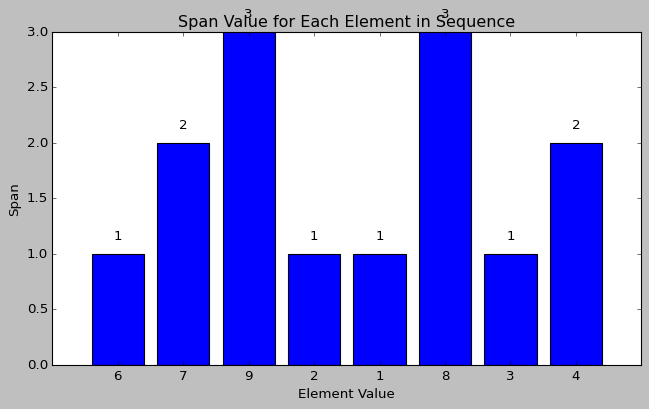

In [43]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

# Create the bar plot
ax.bar(range(len(sequence)), span, tick_label=sequence)

# Add labels and title
ax.set_title('Span Value for Each Element in Sequence')
ax.set_xlabel('Element Value')
ax.set_ylabel('Span')

# Optionally, add value labels above bars
for idx, value in enumerate(span):
    ax.text(idx, value + 0.1, str(value), ha='center', va='bottom')

/var/folders/7z/2r2pl0fn7pj1ym51ky93fl7m0000gn/T/ipykernel_5261/3194667859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(len(sequence))), y=span, palette="Blues_d", ax=ax)


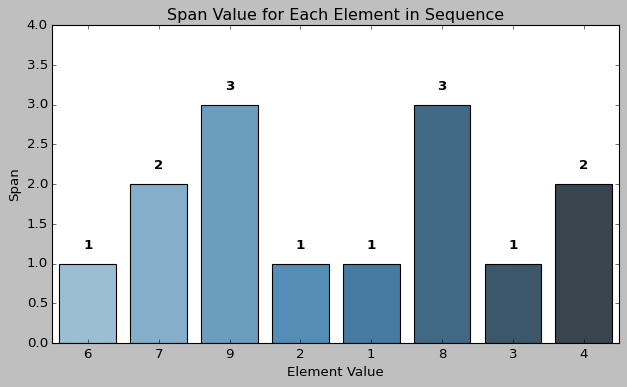

In [47]:
# better visualisation thru seaborn

import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 5))  # avoid plt.figure()
sns.barplot(x=list(range(len(sequence))), y=span, palette="Blues_d", ax=ax)

ax.set_xticks(range(len(sequence)))
ax.set_xticklabels(sequence)
ax.set_xlabel('Element Value')
ax.set_ylabel('Span')
ax.set_title('Span Value for Each Element in Sequence')

for idx, value in enumerate(span):
    ax.text(idx, value + 0.15, str(value), ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')
ax.set_ylim(0, max(span) + 1)

plt.tight_layout()


Help on method sample in module random:

sample(population, k, *, counts=None) method of random.Random instance
    Chooses k unique random elements from a population sequence.

    Returns a new list containing elements from the population while
    leaving the original population unchanged.  The resulting list is
    in selection order so that all sub-slices will also be valid random
    samples.  This allows raffle winners (the sample) to be partitioned
    into grand prize and second place winners (the subslices).

    Members of the population need not be hashable or unique.  If the
    population contains repeats, then each occurrence is a possible
    selection in the sample.

    Repeated elements can be specified one at a time or with the optional
    counts parameter.  For example:

        sample(['red', 'blue'], counts=[4, 2], k=5)

    is equivalent to:

        sample(['red', 'red', 'red', 'red', 'blue', 'blue'], k=5)

    To choose a sample from a range of integers, use 